In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score

### Q2. Selecting Perform Variable Selection. Choose one of the following techniques and explain why you selected that one.
* Lasso: https://en.wikipedia.org/wiki/Lasso_(statistics))
* KNN
* Correlation

In [3]:
#Read the data
data = pd.read_csv('Group_14_Clean_Data.csv')
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [4]:
#Checking the correlation matrix
corr = data.corr()

<ipython-input-4-0ba1501a6a21>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


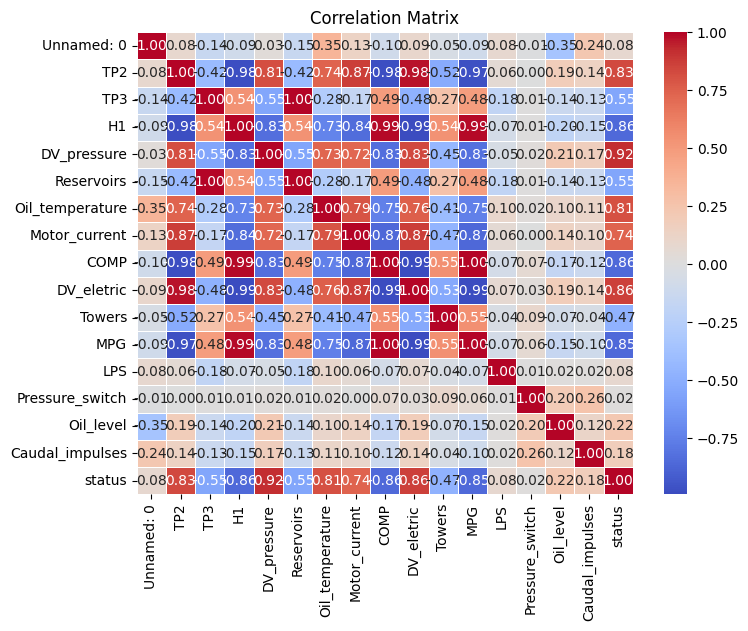

In [5]:
# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

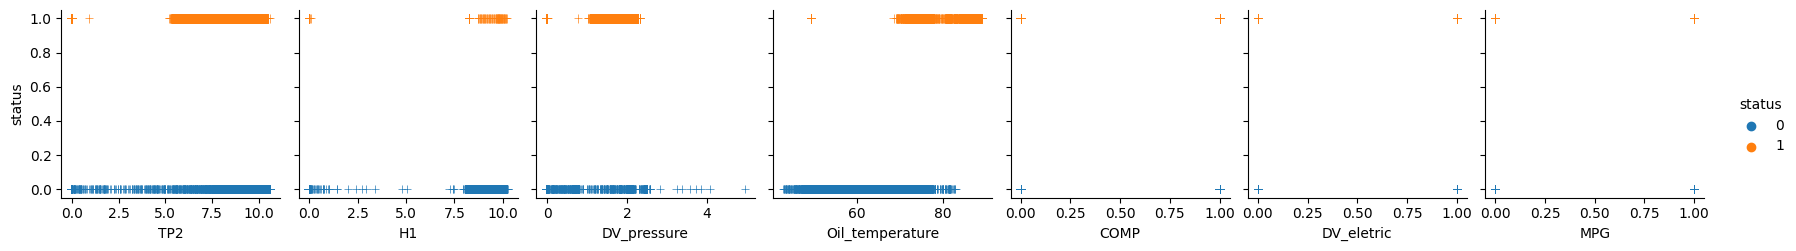

In [6]:
sns.pairplot(data,
                 x_vars=["TP2","H1","DV_pressure","Oil_temperature", 'COMP', 'DV_eletric', 'MPG'],
                 y_vars=["status"], hue="status", markers = "+")

Since the correlation plot shows strong relationships between predictor variables and target variables, our group chose the Lasso method for feature selection. The Lasso method is known for its ability to select relevant features and reduce the impact of irrelevant ones, making it a suitable choice for our analysis. Additionally, it helps prevent overfitting by introducing a penalty term that encourages sparsity in the model. Compared to using KNN and correlation coefficients, the Lasso method provides a more robust and interpretable solution. It not only considers the relationships between predictors and the target variable but also takes into account the multicollinearity among predictors, which can lead to biased coefficient estimates. Moreover, the Lasso method allows for automatic feature selection, eliminating the need for manual selection based on expert knowledge or trial and error. Overall, using the Lasso method will enhance the accuracy and interpretability of our analysis.

In [7]:
x = data.iloc[:, 2:-1]
y = data.iloc[:, -1]
x.head()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [15]:
# Create a LassoCV model
lasso_cv = LassoCV(cv=10)

# Use SelectFromModel to perform feature selection based on feature importance
sfm = SelectFromModel(lasso_cv, threshold='median')

In [16]:
#Separate train test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
lasso_cv.fit(X_train, y_train)

LassoCV(cv=5)

In [42]:
print(f"List of features before selection:\n {', '.join(X_train.columns)}")

List of features before selection:
 TP2, TP3, H1, DV_pressure, Reservoirs, Oil_temperature, Motor_current, COMP, DV_eletric, Towers, MPG, LPS, Pressure_switch, Oil_level, Caudal_impulses


In [41]:
selected_features = X_train.columns[lasso_cv.coef_ != 0]
print(f"List of selected features:\n {', '.join(selected_features)}")

List of selected features:
 TP2, H1, DV_pressure, Reservoirs, Oil_temperature, Motor_current, Oil_level
